Learned Q-table:
[[20. 18.]
 [20. 20.]
 [20. 20.]
 [ 0.  0.]]

Optimal Policy (0: Left, 1: Right):
[0 0 0 0]


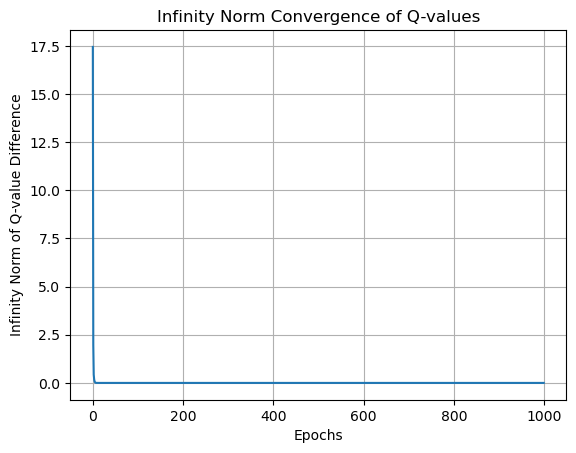

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
n_states = 4  # Number of states in the grid world (including goal state)
n_actions = 2  # Number of possible actions (Left, Right)

# Initialize Q-table with zeros
Q_table = np.zeros((n_states, n_actions))

# Define parameters
learning_rate = 0.8
discount_factor = 0.95
exploration_prob = 0.3
epochs = 1000
iterations_per_epoch = 100  # Fixed number of iterations per epoch
d = 1.0  # Constant reward value for state s=1

# Function to calculate rewards based on state and action
def calculate_reward(state, action):
    if state == 1:
        if action == 0:  # Action L
            return d
        elif action == 1:  # Action R
            return -d
    elif state in [2, 3]:
        return 1  # Deterministic reward of 1 for states 2 and 3
    else:
        return 0  # Default reward (assuming non-terminal states have 0 reward)

# Store Q-tables at each iteration
Q_tables_over_time = []

# Q-learning algorithm
for epoch in range(epochs):
    for _ in range(iterations_per_epoch):
        current_state = np.random.randint(1, n_states)  # Start from a random state (1, 2, or 3)

        # Choose action with epsilon-greedy strategy
        if np.random.rand() < exploration_prob:
            action = np.random.randint(0, n_actions)  # Explore
        else:
            action = np.argmax(Q_table[current_state - 1])  # Exploit (adjust index for zero-based Q-table)

        # Simulate the environment (move to the next state)
        next_state = current_state + 1 if current_state < n_states - 1 else current_state

        # Calculate reward
        reward = calculate_reward(current_state, action)

        # Update Q-value using the Q-learning update rule
        Q_table[current_state - 1, action] += learning_rate * \
            (reward + discount_factor *
             np.max(Q_table[next_state - 1]) - Q_table[current_state - 1, action])

    # Store the Q-table at this epoch
    Q_tables_over_time.append(Q_table.copy())

# After training, the Q-table represents the learned Q-values
print("Learned Q-table:")
print(Q_table)

# Extract optimal policy from Q-table
optimal_policy = np.argmax(Q_table, axis=1)  # Choose action with highest Q-value for each state

print("\nOptimal Policy (0: Left, 1: Right):")
print(optimal_policy)
# Calculate the infinity norm of the difference between the optimal Q and Q(s, a) over time
optimal_Q_without_corruption = Q_table  # Assuming the final Q_table is the optimal Q

infinity_norms = [np.max(np.abs(optimal_Q_without_corruption - Q)) for Q in Q_tables_over_time]

# Plot the infinity norm over epochs
plt.plot(infinity_norms)
plt.xlabel('Epochs')
plt.ylabel('Infinity Norm of Q-value Difference')
plt.title('Infinity Norm Convergence of Q-values')
plt.grid()
plt.show()

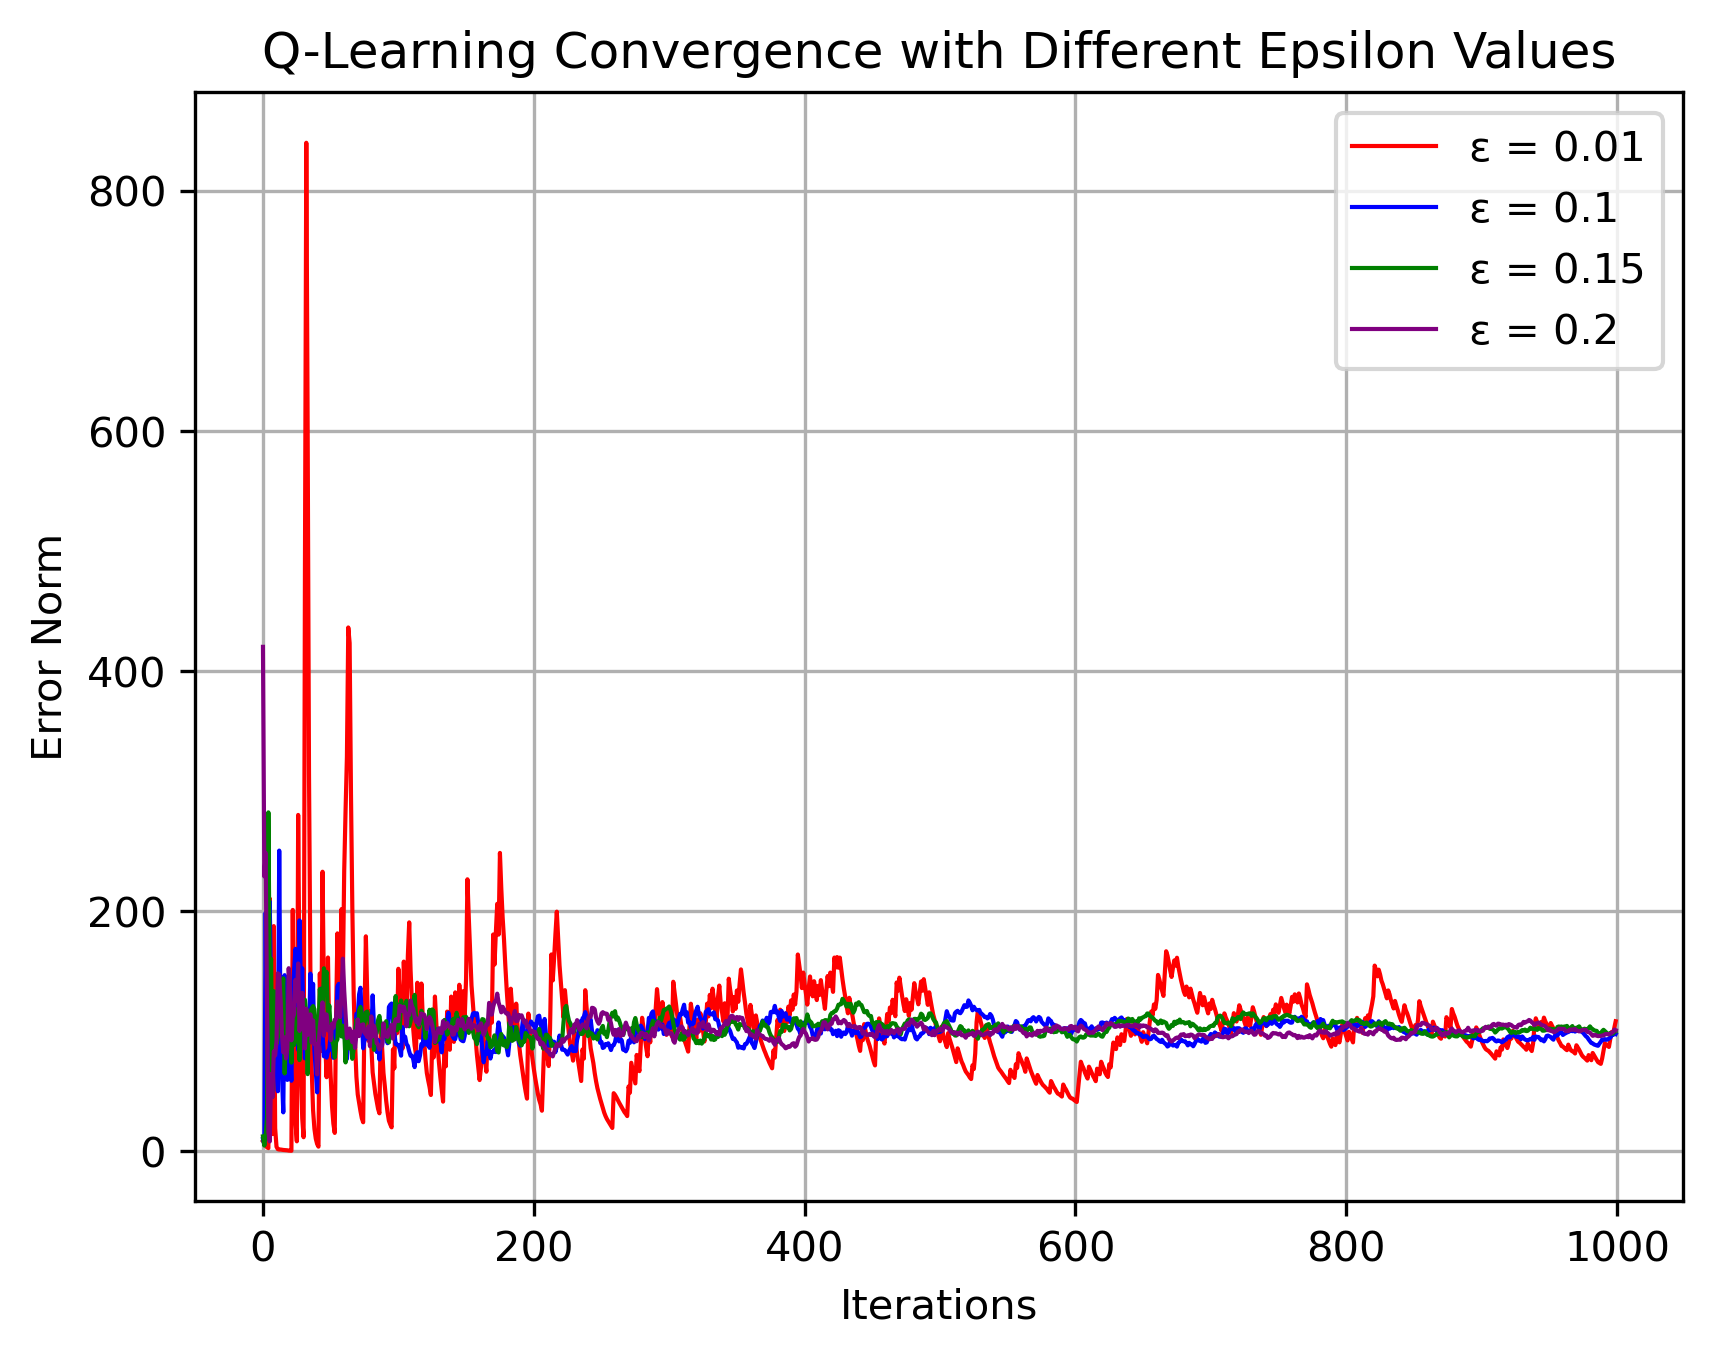

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
n_states = 4  # Number of states in the grid world (including goal state)
n_actions = 2  # Number of possible actions (Left, Right)

# Define parameters
learning_rate = 0.8
discount_factor = 0.95
exploration_prob = 0.2
epochs = 1000
iterations_per_epoch = 100  # Fixed number of iterations per epoch
d = 1.0  # Constant reward value for state s=1
kappa = 100.0  # Positive constant for the attack model
epsilons = [0.01, 0.1, 0.15, 0.20]  # Different values of epsilon

# Store infinity norms for plotting
infinity_norms_all = []

# Loop through each epsilon value
for epsilon in epsilons:
    # Initialize Q-table with zeros
    Q_table = np.zeros((n_states, n_actions))

    # Function to calculate rewards based on state and action
    def calculate_reward(state, action, epsilon):
        if state == 1:
            if action == 0:  # Action L
                if np.random.rand() < epsilon:
                    C = ((2 - epsilon) * d + kappa) / epsilon
                    return C  # Attack with reward C
                else:
                    return d  # Normal reward d
            elif action == 1:  # Action R
                if np.random.rand() < epsilon:
                    C = ((2 - epsilon) * d + kappa) / epsilon
                    return C  # Attack with reward C
                else:
                    return -d  # Normal reward -d
        elif state in [2, 3]:
            return 1  # Deterministic reward of 1 for states 2 and 3
        else:
            return 0  # Default reward (assuming non-terminal states have 0 reward)

    # Store Q-tables at each iteration
    Q_tables_over_time = []

    # Q-learning algorithm
    for epoch in range(epochs):
        for _ in range(iterations_per_epoch):
            current_state = np.random.randint(1, n_states)  # Start from a random state (1, 2, or 3)

            # Choose action with epsilon-greedy strategy
            if np.random.rand() < exploration_prob:
                action = np.random.randint(0, n_actions)  # Explore
            else:
                action = np.argmax(Q_table[current_state - 1])  # Exploit (adjust index for zero-based Q-table)

            # Simulate the environment (move to the next state)
            next_state = current_state + 1 if current_state < n_states - 1 else current_state

            # Calculate reward
            reward = calculate_reward(current_state, action, epsilon)

            # Update Q-value using the Q-learning update rule
            Q_table[current_state - 1, action] += (learning_rate / (epoch + 1)) * \
                (reward + discount_factor * np.max(Q_table[next_state - 1]) - Q_table[current_state - 1, action])

        # Store the Q-table at this epoch
        Q_tables_over_time.append(Q_table.copy())

    # Assuming the final Q_table is the optimal Q without corruption for comparison
    optimal_Q = Q_table

    # Calculate the infinity norm of the difference between the optimal Q and Q(s, a) over time
    infinity_norms = [np.max(np.abs(optimal_Q_without_corruption - Q)) for Q in Q_tables_over_time]

    # Store infinity norms for each epsilon
    infinity_norms_all.append(infinity_norms)

# Plot the infinity norm over epochs for each epsilon
plt.figure(dpi=300)  # Set HD resolution
colors = ['red', 'blue', 'green', 'purple']
labels = [f'ε = {epsilon}' for epsilon in epsilons]

for i, epsilon in enumerate(epsilons):
    plt.plot(infinity_norms_all[i], color=colors[i], label=labels[i],linewidth=1)

plt.xlabel('Iterations')
plt.ylabel('Error Norm')
plt.title('Q-Learning Convergence with Different Epsilon Values')
plt.legend()
plt.grid()
plt.savefig('Q_learning_convergence_plot_with_different_epsilons.png', format='png', dpi=300)  # Save as PNG with HD resolution
plt.show()
